In [1]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [16]:
# 기본 경로
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/tmp/cats_and_dogs_filtered/train/cats
/tmp/cats_and_dogs_filtered/train/dogs
/tmp/cats_and_dogs_filtered/validation/cats
/tmp/cats_and_dogs_filtered/validation/dogs


In [17]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg']


In [18]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


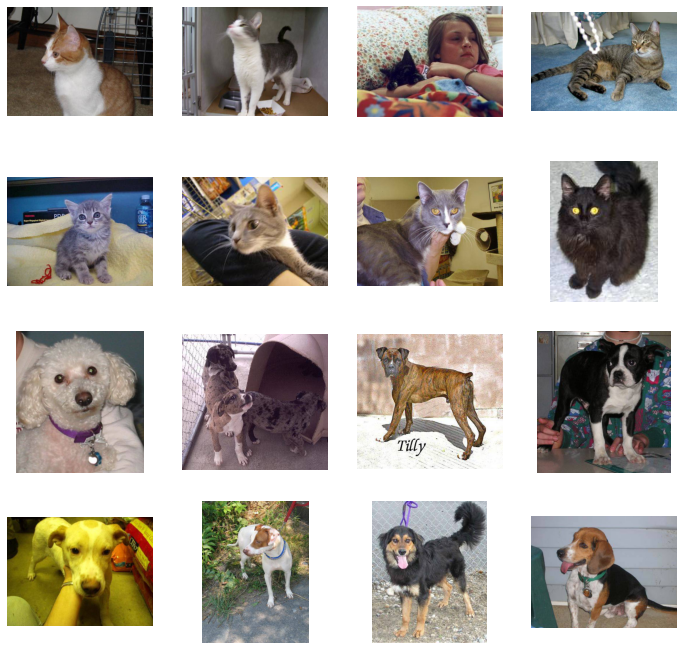

In [19]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [20]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [21]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2)

Epoch 1/100
Epoch 1/100
100/100 - 33s - loss: 0.7460 - acc: 0.5775 - val_loss: 0.6236 - val_acc: 0.6730
Epoch 2/100
Epoch 1/100
100/100 - 31s - loss: 0.6199 - acc: 0.6765 - val_loss: 0.5926 - val_acc: 0.6800
Epoch 3/100
Epoch 1/100
100/100 - 30s - loss: 0.5394 - acc: 0.7310 - val_loss: 0.6029 - val_acc: 0.6920
Epoch 4/100
Epoch 1/100
100/100 - 30s - loss: 0.4556 - acc: 0.7870 - val_loss: 0.5833 - val_acc: 0.7030
Epoch 5/100
Epoch 1/100
100/100 - 30s - loss: 0.3632 - acc: 0.8350 - val_loss: 0.7636 - val_acc: 0.6910
Epoch 6/100
Epoch 1/100
100/100 - 30s - loss: 0.2867 - acc: 0.8725 - val_loss: 0.7741 - val_acc: 0.6880
Epoch 7/100
Epoch 1/100
100/100 - 39s - loss: 0.2045 - acc: 0.9220 - val_loss: 0.8079 - val_acc: 0.6990
Epoch 8/100
Epoch 1/100
100/100 - 35s - loss: 0.1387 - acc: 0.9455 - val_loss: 0.9570 - val_acc: 0.7090
Epoch 9/100
Epoch 1/100
100/100 - 39s - loss: 0.1110 - acc: 0.9600 - val_loss: 1.0114 - val_acc: 0.7220
Epoch 10/100
Epoch 1/100
100/100 - 37s - loss: 0.0680 - acc: 0.9

Epoch 79/100
Epoch 1/100
100/100 - 30s - loss: 0.0020 - acc: 0.9990 - val_loss: 6.3335 - val_acc: 0.7190
Epoch 80/100
Epoch 1/100
100/100 - 39s - loss: 7.7274e-04 - acc: 1.0000 - val_loss: 6.3120 - val_acc: 0.7170
Epoch 81/100
Epoch 1/100
100/100 - 31s - loss: 1.3556e-06 - acc: 1.0000 - val_loss: 6.2321 - val_acc: 0.7170
Epoch 82/100
Epoch 1/100
100/100 - 31s - loss: 5.0696e-09 - acc: 1.0000 - val_loss: 6.1651 - val_acc: 0.7180
Epoch 83/100
Epoch 1/100
100/100 - 31s - loss: 0.0010 - acc: 0.9995 - val_loss: 6.5535 - val_acc: 0.7170
Epoch 84/100
Epoch 1/100
100/100 - 31s - loss: 0.0012 - acc: 0.9995 - val_loss: 6.1475 - val_acc: 0.7090
Epoch 85/100
Epoch 1/100
100/100 - 31s - loss: 1.2318e-08 - acc: 1.0000 - val_loss: 6.2399 - val_acc: 0.7160
Epoch 86/100
Epoch 1/100
100/100 - 31s - loss: 3.1786e-09 - acc: 1.0000 - val_loss: 6.4919 - val_acc: 0.7210
Epoch 87/100
Epoch 1/100
100/100 - 31s - loss: 1.2307e-10 - acc: 1.0000 - val_loss: 6.6955 - val_acc: 0.7210
Epoch 88/100
Epoch 1/100
100/10

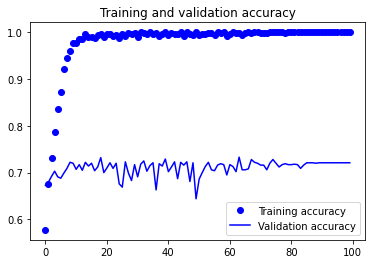

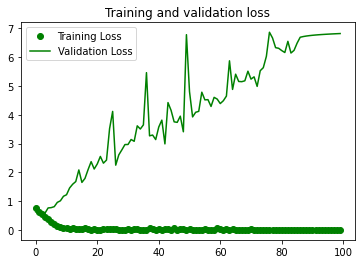

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image

uploaded=files.upload() #google.colab - files 모듈을 대신해 직접 업로드 후, 경로 지정을 하는 방법 적용

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

ModuleNotFoundError: No module named 'google.colab'